<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/Week_3%20CNN%20no1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping



In [3]:
# Load CIFAR-10 dataset from TensorFlow Datasets
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (32, 32))
    return image, label

ds_train, ds_test = tfds.load("cifar10", split=["train", "test"], as_supervised=True)
ds_train = ds_train.map(preprocess).batch(32).shuffle(10000)
ds_test = ds_test.map(preprocess).batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.5S9URV_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.5S9URV_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [4]:
# TensorFlow CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
cnn_model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.3460 - loss: 1.7686 - val_accuracy: 0.5484 - val_loss: 1.2647
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5729 - loss: 1.2141 - val_accuracy: 0.6027 - val_loss: 1.1100
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6296 - loss: 1.0430 - val_accuracy: 0.6447 - val_loss: 1.0046
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6728 - loss: 0.9353 - val_accuracy: 0.6726 - val_loss: 0.9294
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7012 - loss: 0.8503 - val_accuracy: 0.6627 - val_loss: 0.9782
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7158 - loss: 0.8047 - val_accuracy: 0.6659 - val_loss: 0.9732
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7432 - loss: 0.7422 - val_accuracy: 0.6965 - val_loss: 0.8810
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7561 - loss: 0.6933

In [8]:
# Evaluate and Calculate Metrics
y_true = []
y_pred = []
y_pred_proba = []  # For storing probability predictions

for images, labels in ds_test:
    predictions = cnn_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))
    y_pred_proba.extend(predictions)  # Storing the probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━

In [9]:
# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
roc_auc = roc_auc_score(y_true, np.array(y_pred_proba), multi_class='ovr')  # Update with probabilities
conf_matrix = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.6875
Precision: 0.7079
Recall: 0.6875
F1 Score: 0.6926
ROC AUC: 0.9514
Confusion Matrix:
[[678  20 130  27  36   7   8  14  36  44]
 [ 16 833  17   9  14  10   6   4  15  76]
 [ 34   5 604  85 111  89  33  29   4   6]
 [  9   4  66 554 104 189  32  28   5   9]
 [ 12   0  75  55 748  46  16  41   2   5]
 [  9   3  48 182  57 644   7  42   0   8]
 [  3   9  88  80 100  52 654  10   1   3]
 [ 12   0  33  67 105  82   2 685   1  13]
 [ 65  58  42  26  29  19  10   6 712  33]
 [ 22 112  19  25  13  15   5  11  15 763]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1

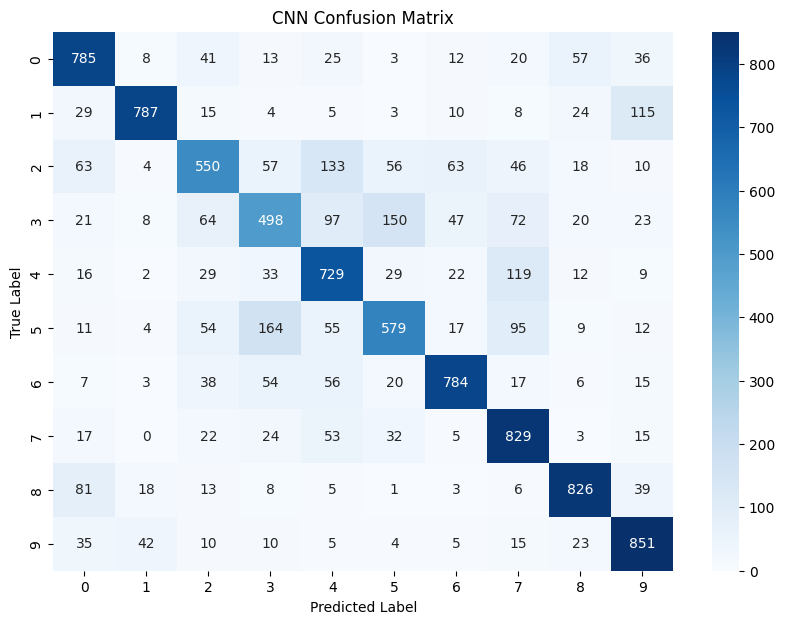

In [24]:

# CNN model evaluation
y_true_cnn = []
y_pred_cnn = []
y_pred_proba_cnn = []

# Gantilah 'ds_test' dengan dataset yang sesuai
for images, labels in ds_test:
    predictions = cnn_model.predict(images)
    y_true_cnn.extend(labels.numpy())
    y_pred_cnn.extend(np.argmax(predictions, axis=1))
    y_pred_proba_cnn.extend(predictions)

# Calculate performance metrics for CNN
accuracy_cnn = accuracy_score(y_true_cnn, y_pred_cnn)
precision_cnn = precision_score(y_true_cnn, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_true_cnn, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_true_cnn, y_pred_cnn, average='weighted')
roc_auc_cnn = roc_auc_score(y_true_cnn, np.array(y_pred_proba_cnn), multi_class='ovr')

# Print performance metrics
print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1 Score: {f1_cnn:.4f}")
print(f"CNN ROC AUC: {roc_auc_cnn:.4f}")

# Confusion matrix for CNN
cnn_confusion_matrix = confusion_matrix(y_true_cnn, y_pred_cnn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cnn_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2501 - loss: 2.0605 - val_accuracy: 0.3884 - val_loss: 1.7468
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3486 - loss: 1.8104 - val_accuracy: 0.3979 - val_loss: 1.6800
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3807 - loss: 1.7339 - val_accuracy: 0.4274 - val_loss: 1.6201
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3962 - loss: 1.6928 - val_accuracy: 0.4440 - val_loss: 1.5669
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4148 - loss: 1.6491 - val_accuracy: 0.4552 - val_loss: 1.5467
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4238 - loss: 1.6329 - val_accuracy: 0.4527 - val_loss: 1.5405
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4321 - loss: 1.5971 - val_accuracy: 0.4656 - val_loss: 1.5107
Epoch 8/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4377 - loss: 1.5783 -

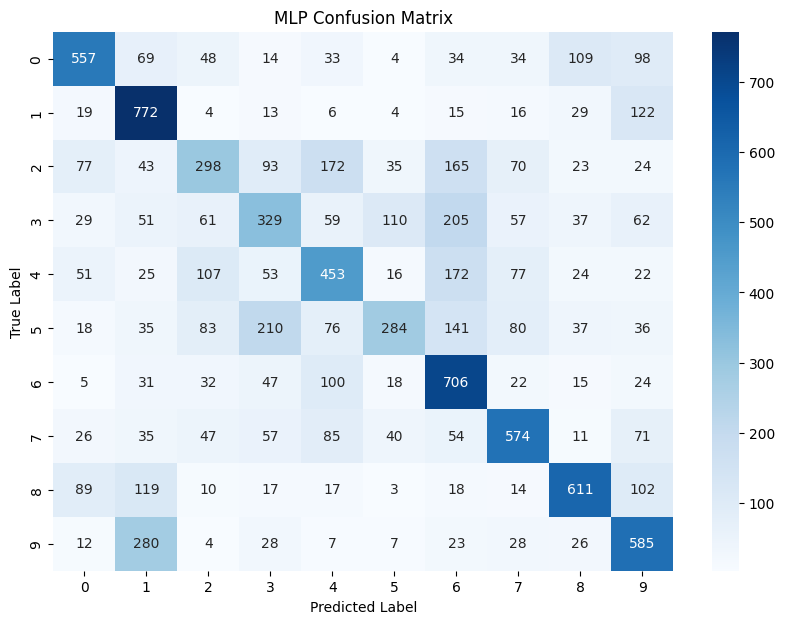

In [33]:

# MLP model with improved architecture (adding Dropout and increasing units)
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# EarlyStopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Training the MLP model with data augmentation
mlp_model.fit(ds_train, epochs=35, validation_data=ds_test, callbacks=[early_stopping])

# MLP model evaluation
y_true_mlp = []
y_pred_mlp = []
y_pred_proba_mlp = []

# Gantilah 'ds_test' dengan dataset yang sesuai
for images, labels in ds_test:
    predictions = mlp_model.predict(images)
    y_true_mlp.extend(labels.numpy())
    y_pred_mlp.extend(np.argmax(predictions, axis=1))
    y_pred_proba_mlp.extend(predictions)

# Calculate performance metrics for MLP
accuracy_mlp = accuracy_score(y_true_mlp, y_pred_mlp)
precision_mlp = precision_score(y_true_mlp, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_true_mlp, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_true_mlp, y_pred_mlp, average='weighted')
roc_auc_mlp = roc_auc_score(y_true_mlp, np.array(y_pred_proba_mlp), multi_class='ovr')

# Print performance metrics
print(f"MLP Accuracy: {accuracy_mlp:.4f}")
print(f"MLP Precision: {precision_mlp:.4f}")
print(f"MLP Recall: {recall_mlp:.4f}")
print(f"MLP F1 Score: {f1_mlp:.4f}")
print(f"MLP ROC AUC: {roc_auc_mlp:.4f}")

# Confusion matrix for MLP
mlp_confusion_matrix = confusion_matrix(y_true_mlp, y_pred_mlp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mlp_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()